# ANALYSE TRAITEMENT ET MODELISATION DES TEXTES

In [ ]:
# CHARGEMENT DES DONNEES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_column',999)
pd.set_option('display.max_row',999)
np.set_printoptions(threshold=5)
import os
import ast
import re
import nltk
from wordcloud import WordCloud
import gensim.corpora as corpora
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [184]:
data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv', delimiter=',',encoding='utf-8')

data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [185]:
df = data[['product_category_tree','description']].copy()

In [186]:
df['product_category_tree'] = df['product_category_tree'].astype('string')

In [187]:
df[['category_0', 'category_1','category_2']] = df['product_category_tree'].str.split('>>', 2, expand=True)

In [188]:
df["category_0"]= df["category_0"].str[2:]

In [189]:
df["category_0"] = df["category_0"].str[:-1]

In [190]:
df.groupby('category_1').count()

,product_category_tree,description,category_0,category_2
category_1,,,,
Baby & Kids Gifts,15,15,15,15
Baby Bath & Skin,14,14,14,14
Baby Bedding,15,15,15,15
Baby Grooming,4,4,4,4
Bar & Glassware,8,8,8,8
Bath Linen,21,21,21,21
Bath and Spa,7,7,7,7
Beauty Accessories,1,1,1,1
Bed Linen,65,65,65,65


In [191]:
df.groupby('category_0').count()

,product_category_tree,description,category_1,category_2
category_0,,,,
Baby Care,150,150,150,150
Beauty and Personal Care,150,150,150,150
Computers,150,150,150,150
Home Decor & Festive Needs,150,150,150,149
Home Furnishing,150,150,150,148
Kitchen & Dining,150,150,150,150
Watches,150,150,150,150


In [192]:
dfstat=df.groupby(['category_0', 'category_1']).size().reset_index(name='counts')

In [193]:
dfstat

,category_0,category_1,counts
0,Baby Care,Baby & Kids Gifts,15
1,Baby Care,Baby Bath & Skin,14
2,Baby Care,Baby Bedding,15
3,Baby Care,Baby Grooming,4
4,Baby Care,Diapering & Potty Training,7
5,Baby Care,Feeding & Nursing,8
6,Baby Care,Furniture & Furnishings,2
7,Baby Care,Infant Wear,84
8,Baby Care,Strollers & Activity Gear,1
9,Beauty and Personal Care,Bath and Spa,7


In [194]:
# 7 catégories équilibrées

In [195]:
labels=list(df["category_0"])

In [196]:
lab=np.unique(labels)
lab

array(['Baby Care', 'Beauty and Personal Care', 'Computers', ...,
       'Home Furnishing', 'Kitchen & Dining', 'Watches'], dtype='<U26')

[None, Text(0.5, 1.0, 'Categories')]

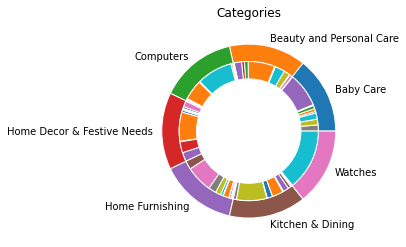

In [197]:
size = 0.2
fig, ax = plt.subplots()

ax.pie(dfstat.groupby('category_0')['counts'].sum(), radius=1, labels=lab,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(dfstat['counts'], radius=1-size, 
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Categories')

In [198]:
df = df[["description","category_0","category_1"]]

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  1050 non-null   object
 1   category_0   1050 non-null   string
 2   category_1   1050 non-null   string
dtypes: object(1), string(2)
memory usage: 24.7+ KB


In [200]:
# PRE PROCESSING

In [201]:
# Le preprocessing consiste à enlever les caractères qui ne sont pas des lettres comme “#”, “-“, “!”, 
# les chiffres ou bien encore les mots qui n’ont pas de sens 

In [202]:
import re
df['description_processed'] = df['description'].map(lambda x: re.sub('[^a-z\s]+', ' ', x,flags=re.IGNORECASE))

In [203]:
df['description_processed'] = df['description_processed'].map(lambda x: x.strip())

In [204]:
df['description_processed'] = df['description_processed'].map(lambda x: x.lower())

In [205]:
df['description_processed'] = df['description_processed'].map(lambda x: re.sub('(\s+)', ' ', x))

In [207]:
df

,description,category_0,category_1,description_processed
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,key features of elegance polyester multicolor ...
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,specifications of sathiyas cotton bath towel b...
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,key features of eurospa cotton terry face towe...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,key features of santosh royal fashion cotton p...
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,key features of jaipur print cotton floral kin...
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,Baby & Kids Gifts,oren empower extra large self adhesive sticker...
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,Baby & Kids Gifts,wallmantra large vinyl sticker sticker pack of...
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,Baby & Kids Gifts,buy uberlyfe extra large pigmented polyvinyl f...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,Baby & Kids Gifts,buy wallmantra medium vinyl sticker sticker fo...


# Bibliothèques nécessaires

In [208]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Catherine\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Catherine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [209]:
# Ensuite on initialise :

#    les stopwords, ce sont les mots qui apparaissent très fréquemment mais qui n’apportent pas de sens à la phrase (comme “de”, “le”, “une”)
#    les mots (words) qui proviennent d’un dictionnaire anglais (directement intégré à la librairie nltk)
#    un lemmatizer, cette objet nous permet de préserver la racine des mots de tel sorte que deux mots ayant une même souche seront 
#    considérés comme un seul et même mot (exemple : ‘voisine’ et ‘voisinage’ seront tous deux changer en ‘voisin’)

In [210]:
stopwords = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())

In [156]:
# fonction de preprocessing qui va :
#    enlever la ponctuation
#    enlever les chiffres
#    transformer les phrases en liste de tokens (en liste de mots)
#    enlever les stopwords (mots n’apportant pas de sens)
#    lemmatizer#    
#    reformer les phrases avec les mots restants

In [211]:
def lemmatize_string(str_arg):
    
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    tokens = tokenizer.tokenize(str_arg.lower())
    tokens = [lemmatizer.lemmatize(
                        lemmatizer.lemmatize(
                            lemmatizer.lemmatize(w,'n'),'a'),'v') for w in tokens]
    lemmatized_string = ' '.join(tokens)
    return lemmatized_string 

In [212]:
df['description_processed']= df['description_processed'].apply(lemmatize_string)

In [213]:
df

,description,category_0,category_1,description_processed
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,key feature of elegance polyester multicolor a...
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,specification of sathiyas cotton bath towel ba...
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,key feature of eurospa cotton terry face towel...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,key feature of santosh royal fashion cotton pr...
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,key feature of jaipur print cotton floral king...
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,Baby & Kids Gifts,oren empower extra large self adhesive sticker...
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,Baby & Kids Gifts,wallmantra large vinyl sticker sticker pack of...
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,Baby & Kids Gifts,buy uberlyfe extra large pigment polyvinyl fil...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,Baby & Kids Gifts,buy wallmantra medium vinyl sticker sticker fo...


In [214]:
def remove_stopwords(str_arg, stopwords_list):
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(str_arg.lower())
    cleaned_tokens = [x for x in tokens if x not in stopwords_list]
    cleaned_string = ' '.join(cleaned_tokens)
    return cleaned_string

In [216]:
stopwords_list = nltk.corpus.stopwords.words('english')
df['description_processed']= df['description_processed'].apply(lambda x : remove_stopwords(x, stopwords_list))
df

,description,category_0,category_1,description_processed
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,key feature elegance polyester multicolor abst...
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,specification sathiyas cotton bath towel bath ...
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,key feature eurospa cotton terry face towel se...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,key feature santosh royal fashion cotton print...
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,key feature jaipur print cotton floral king si...
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,Baby & Kids Gifts,oren empower extra large self adhesive sticker...
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,Baby & Kids Gifts,wallmantra large vinyl sticker sticker pack pr...
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,Baby & Kids Gifts,buy uberlyfe extra large pigment polyvinyl fil...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,Baby & Kids Gifts,buy wallmantra medium vinyl sticker sticker r ...


In [217]:
train_data = df['description_processed']

In [219]:
train_data

0       key feature elegance polyester multicolor abst...
1       specification sathiyas cotton bath towel bath ...
2       key feature eurospa cotton terry face towel se...
3       key feature santosh royal fashion cotton print...
4       key feature jaipur print cotton floral king si...
                              ...                        
1045    oren empower extra large self adhesive sticker...
1046    wallmantra large vinyl sticker sticker pack pr...
1047    buy uberlyfe extra large pigment polyvinyl fil...
1048    buy wallmantra medium vinyl sticker sticker r ...
1049    buy uberlyfe large vinyl sticker r online uber...
Name: description_processed, Length: 1050, dtype: object

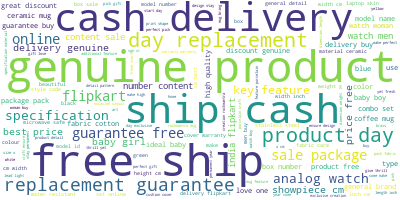

In [220]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['description_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [221]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
all_words = tokenizer.tokenize(' '.join(df['description']))

# Display number of words
print('Before cleaning')
print('Number of words: {}'.format(len(all_words)))

# Display number of unique word
print('Number of unique words: {}'.format(len(set(all_words))))

Before cleaning
Number of words: 81563
Number of unique words: 7670


In [222]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
all_words = tokenizer.tokenize(' '.join(df['description_processed']))

# Display number of words
print('Before cleaning')
print('Number of words: {}'.format(len(all_words)))

# Display number of unique word
print('Number of unique words: {}'.format(len(set(all_words))))

Before cleaning
Number of words: 56972
Number of unique words: 4294


In [223]:
from sklearn import manifold, decomposition
def pca(X):
    '''function reduce dimensions using t-SNE PCA keeping 99% of variance, returns np array and df '''
    
    print('dim before PCA : ', X.shape)
    pca = decomposition.PCA(n_components=0.99)
    X_pca = pca.fit_transform(X)
    print('dim after PCA : ', X_pca.shape)
    df_pca = pd.DataFrame(X_pca)
    return X_pca, df_pca

def tsne(X, n):
    '''function to reduce dimensions using t-SNE with n compotents, returns np array and df'''
    t = time.time()
    tsne = manifold.TSNE(n_components=n,
                         perplexity=30,
                         n_iter=2000, init='random', random_state=6)
    X_tsne = tsne.fit_transform(X)

    columns = []
    for i in range(1, n+1):
        columns.append('tsne'+str(i))
    df_tsne = pd.DataFrame(X_tsne, columns=columns)

    d = time.time() - t
    print('dim after t-SNE : ', X_tsne.shape)
    print('timing : ', '%15.2f' % d, 's')
    return X_tsne, df_tsne

In [224]:
def conf_mat_transform(conf_mat) :
    '''function to re-assign clusters by maximizing the diagonal of the confusion matrix'''

    # Inverse the number of items per categories (in order to use following function)
    conf_mat_temp = 1 /(conf_mat + 0.001)
    
    # apply function to get the combination of columns to minimize the diagonal 
    from scipy.optimize import linear_sum_assignment
    row_ind, col_ind = linear_sum_assignment(conf_mat_temp)

    # transform matrix according to new columns combination
    conf_mat_transform = conf_mat[:, col_ind]
    
    # reverse liste of column index
    corresp = col_ind.tolist()
    
    return corresp, conf_mat_transform

In [225]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler,  Normalizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import manifold, decomposition
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [226]:
df

,description,category_0,category_1,description_processed
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,key feature elegance polyester multicolor abst...
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,specification sathiyas cotton bath towel bath ...
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,key feature eurospa cotton terry face towel se...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,key feature santosh royal fashion cotton print...
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,key feature jaipur print cotton floral king si...
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,Baby & Kids Gifts,oren empower extra large self adhesive sticker...
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,Baby & Kids Gifts,wallmantra large vinyl sticker sticker pack pr...
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,Baby & Kids Gifts,buy uberlyfe extra large pigment polyvinyl fil...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,Baby & Kids Gifts,buy wallmantra medium vinyl sticker sticker r ...


# BOW

In [42]:
# 1-gram

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english')
X_bow = vect.fit_transform(df['description_processed']) 
df_bow = pd.DataFrame(X_bow.toarray(), columns = vect.get_feature_names(), index = df.index)
df_bow.shape
df_bow['category_0']= df['category_0']
df_bow_by_cat = df_bow.groupby(['category_0'])

In [44]:
X_bow

<1050x4174 sparse matrix of type '<class 'numpy.int64'>'
	with 32537 stored elements in Compressed Sparse Row format>

In [45]:
df_bow

,aa,aaa,aapno,aari,aarika,abide,ability,abkl,able,abrasion,abroad,absolute,absorb,absorbency,absorbent,absorber,abstract,abstrcts,ac,accent,access,accessory,accident,accidental,accommodate,accomplish,accord,acer,ache,aci,acid,acl,acne,acrylic,act,active,actual,ad,adaa,adapter,adaptor,add,addiction,addition,additional,additionally,adf,adhesive,adi,adidas,adino,adjust,adjustable,admiration,admire,adorable,adorn,adsl,advance,advice,advisable,aero,affect,affordable,afternoon,agarwood,age,ageless,agrasen,agree,agromech,aid,air,airport,airtel,airtex,airtight,ajmal,akada,akshaj,akup,al,alarm,alcohol,aleo,alfajr,alive,allin,allover,allow,alloy,alluminium,allure,ally,almond,aloe,aloevera,alpha,alphabet,alrams,alter,alteration,alternative,alternatively,altimeter,altitude,aluminium,aluminum,amaze,amazwh,amber,ambience,america,amit,ammonia,amnesia,amp,amplify,analog,analogue,analyzer,ancestral,ancient,andre,andriod,android,angel,angelica,angry,animal,animate,anise,anjalika,anjeer,anna,anniversary,annoy,anodise,anodize,ant,antenna,anthelios,anthill,anti,antibacterial,antimicrobial,antique,antiqueshop,antrum,anymore,anytime,aop,apart,apex,apl,apollo,app,apparance,apparel,appeal,appear,appearance,apple,applicable,application,applicator,applique,apply,appreciate,appreciation,approach,approx,apron,ar,arabian,arabic,arabicoudh,arb,arch,archer,archies,architecture,area,arecaceae,aries,armani,arnavs,aroma,arrange,arrangement,array,arrival,arsalan,art,arthritis,artifact,artificial,artisan,artist,artistic,artpiece,artrmmw,artwork,ash,asia,asiacraft,ask,aspect,aspire,assemble,assembly,assort,assure,ast,aster,asthma,astonish,astringent,asus,asvtwl,atm,attach,attache,attachment,attention,attitude,attivo,attractive,attribute,audio,aura,aurraa,auspicious,australia,australian,authentic,authentication,authenticity,authorize,auto,automatic,auxiliary,av,avail,availability,available,avasthi,aveeno,avenue,avi,avirug,avocado,avoid,await,awaken,aware,away,awesome,ax,ayurveda,azan,ba,baba,babeezworld,baby,babybucket,babyoye,babywear,background,backlight,backpack,backup,bacteria,bad,bag,bagru,bagua,bain,bajya,bake,bakelite,balaji,balance,ball,balloon,balm,balsam,band,bangle,bank,bankura,bapa,bar,barbie,barcode,barometer,barrage,barrel,barrier,base,basic,basically,basis,basket,basra,batch,bath,bathmat,bathroom,battery,bazaar,bb,bd,bdblue,bdibb,bdoa,beach,bead,bean,bear,bearberry,beat,beautiful,beautifull,beautifully,beautify,beauty,bed,bedroom,bedsheet,bedsheets,bedside,bee,beebay,beer,begin,beige,bela,believe,believer,belkin,bell,bella,belong,beloved,belt,bench,bendable,benefit,bengal,bergner,berlin,bertelin,best,bestway,betaine,beverage,beverly,beyoutiful,bezel,bft,bftcw,bg,bhagavan,bhalaria,bharatcraft,bhavya,bianca,bib,big,bigkik,binatone,bio,bird,birth,birthday,bite,bk,bl,black,blackc,blackled,blackred,blade,bland,blanket,blast,blazer,bleach,blemish,blend,bless,blind,bling,blk,block,blonde,blow,bls,blstri,blu,blue,bluecensor,bluetooth,blush,bmli,bmly,bmp,bmw,bnsi,board,bob,body,bodysuit,bodysuits,boil,bold,bollywood,bolster,bomber,bone,bong,bonjour,bonsai,book,bookmark,boost,bootie,booty,border,bore,boreal,bornbabykids,borse,bos,botanical,botanically,bottle,boundless,bourne,bow,bowl,box,boy,boysiigirls,boywear,bpa,br,bracelet,brahmz,branch,brand,brandwagon,brass,brave,bread,break,breakage,breast,breathable,breathless,breathlessness,breeze,brick,briefcase,bright,brighten,brightness,brillare,brilliance,brilliant,brilliantcolor,brilliantly,bring,bristle,brnaded,broad,broadcast,brocade,bronchitis,broom,brow,brown,brownish,brush,bsf,btp,bts,btsc,bubble,bucket,buckle,bud,buddha,buddhism,buddhist,buffet,build,buildable,...,swing,swiss,switch,swivel,symbol,symbolize,sync,synthetic,ta,tab,table,tablet,tableware,tackle,tag,taklon,talk,tall,tallenge,tanager,tangle,tango,tapawire,tar,target,task,taste,tatvaarts,tawa,tb,tblue,tbtsh,tbtts,tc,td,tdp,te,tea,teal,team,teapot,tear,tease,teatime,techinn,technique,technology,techone,tee,teeth,teflon,tele,tell,temper,temperature,

In [44]:
#2-gram

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english', ngram_range=(2, 2))
X_bow = vect.fit_transform(df['description_processed']) 
df_bow = pd.DataFrame(X_bow.toarray(), columns = vect.get_feature_names(), index = df.index)
df_bow.shape
df_bow['category_0']= df['category_0']
df_bow_by_cat = df_bow.groupby(['category_0'])

In [46]:
X_bow

<1050x17433 sparse matrix of type '<class 'numpy.int64'>'
	with 39466 stored elements in Compressed Sparse Row format>

In [47]:
df_bow

aa battery  aa pencil  aaa battery  aapno rajasthan  aari embroider  \
0              0          0            0                0               0   
1              0          0            0                0               0   
2              0          0            0                0               0   
3              0          0            0                0               0   
4              0          0            0                0               0   
...          ...        ...          ...              ...             ...   
1045           0          0            0                0               0   
1046           0          0            0                0               0   
1047           0          0            0                0               0   
1048           0          0            0                0               0   
1049           0          0            0                0               0   

      aari embroidery  aarika self  abide add  abide order  ability aid  \
0                   0            0          0            0            0   
1                   0            0          0            0            0   
2                   0            0          0            0            0   
3                   0            0          0            0            0   
4                   0            0          0            0            0   
...               ...          ...        ...          ...          ...   
1045                0            0          0            0            0   
1046                0            0          0            0            0   
1047                0            0          0            0            0   
1048                0            0          0            0            0   
1049                0            0          0            0            0   

      ability lightweight  abkl grn  abkl pl  able light  able present  \
0                       0         0        0           0             0   
1                       0         0        0           0             0   
2                       0         0        0           0             0   
3                       0         0        0           0             0   
4                       0         0        0           0             0   
...                   ...       ...      ...         ...           ...   
1045                    0         0        0           0             0   
1046                    0         0        0           0             0   
1047                    0         0        0           0             0   
1048                    0         0        0           0             0   
1049                    0         0        0           0             0   

      abrasion long  abroad family  absolute comfort  absorb capacity  \
0                 0              0                 0                0   
1                 0              0                 0                0   
2                 0              0                 0                0   
3                 0              0                 0                0   
4                 0              0                 0                0   
...             ...            ...               ...              ...   
1045              0              0                 0                0   
1046              0              0                 0                0   
1047              0              0                 0                0   
1048              0              0                 0                0   
1049              0              0                 0                0   

      absorb store  absorbency softness  absorbency towel  absorbent blanket  \
0                0                    0                 0                  0   
1                0                    0                 0                  0   
2                0                    1                 0                  0   
3                0                    0                 0                  0   
4             

In [48]:
# general most common words 
most_common_words = df_bow.drop(columns='category_0')\
                    .T.sum(axis = 1)\
                    .sort_values(ascending = False)\
                    .head(50).index.tolist()
list1 = most_common_words[:25]
list2 = most_common_words[26:]

In [49]:
# Set colors for plots
light_blue = '#2AC3F3'
blue_green = '#6BD8B6'
green = '#A9E04B'
dark_blue = '#004591'
yellow = '#F3C744'
red = '#F37768'
gray = '#7C8894'
colors = [light_blue, dark_blue, blue_green, green, yellow, red, gray]

(0.0, 900.0)

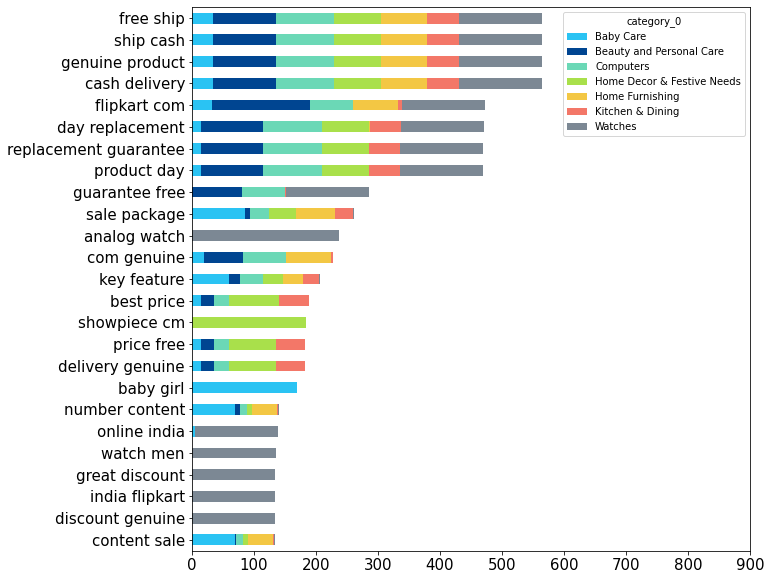

In [50]:
df16 = df_bow_by_cat.agg('sum')[list1[::-1]]
ax = df16.T.plot(kind = 'barh', stacked=True, color = colors, figsize = (10,10), fontsize = 15)
ax.set_xlim(0,900)

(0.0, 900.0)

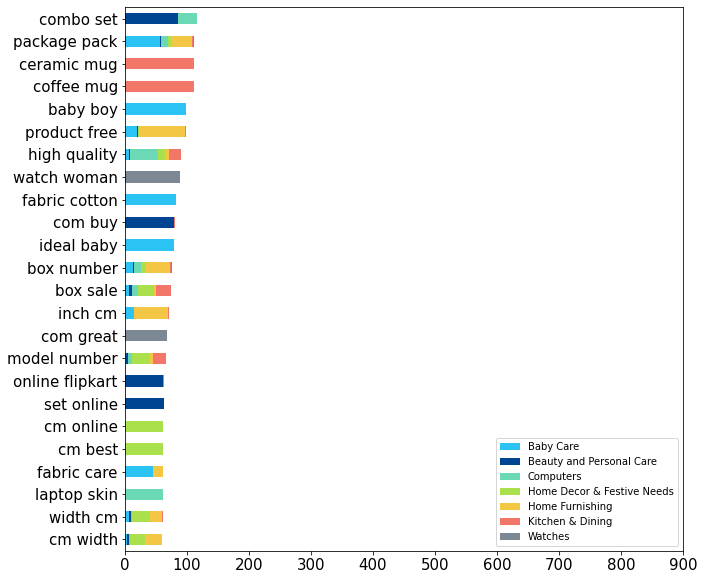

In [51]:
df16= df_bow_by_cat.agg('sum')[list2[::-1]]
ax = df16.T.plot(kind = 'barh', stacked=True, color = colors, figsize = (10,10), 
               fontsize = 15)
ax.legend(loc = 4)
ax.set_xlim(0,900)

# 1ère modélisation de BOW + ngram_range = (1, 1) + PCA + kmeans

In [52]:
X = df['description_processed']

In [59]:
# create pipeline
pca = decomposition.PCA(n_components=0.99, svd_solver='full')
kmeans = KMeans(n_clusters=7, random_state=0, init='k-means++', n_init=10, max_iter=300) # default

pipeline = Pipeline([('vect', CountVectorizer(stop_words = 'english', 
                                              ngram_range = (1, 1), max_df= 0.65, min_df = 0)),
                     ('to_array', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
                     ('pca', pca),
                     ('scaler',  Normalizer()),
                     ('kmeans', kmeans) ])

In [116]:
dict_cat = {'home furnishing': 'home','beauty and personal care': 'beauty', 'computers': 'computers', 'home decor festive needs': 'decor',
            'baby care': 'baby','kitchen dining': 'kitchen','watches': 'watches'}
categories = list(dict_cat.values())

In [117]:
df

,description1,description2,description3
vocabulary,,,
aa,0.0,0.0,0.0
aaa,0.0,0.0,0.0
aapno,0.0,0.0,0.0
aari,0.0,0.0,0.0
aarika,0.0,0.0,0.0
...,...,...,...
zipper,0.0,0.0,0.0
zone,0.0,0.0,0.0
zoom,0.0,0.0,0.0


In [125]:
df.category_0 = pd.Categorical(df.category_0)

In [126]:
df['code'] = df.category_0.cat.codes

In [127]:
model = pipeline.fit(X)
X_pred = pipeline.transform(X)

In [65]:
y_true = df['code']
y_pred = pd.Series(model['kmeans'].labels_)

In [66]:
y_true

0       4
1       0
2       0
3       4
4       4
       ..
1045    0
1046    0
1047    0
1048    0
1049    0
Name: code, Length: 1050, dtype: int8

In [67]:
y_pred

0       3
1       3
2       3
3       3
4       3
       ..
1045    3
1046    3
1047    6
1048    6
1049    6
Length: 1050, dtype: int32

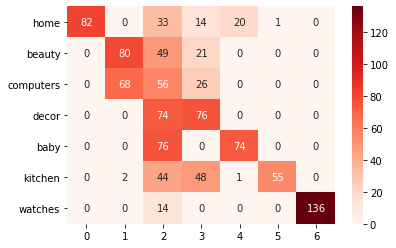

In [68]:
conf_mat = metrics.confusion_matrix(y_true, y_pred)
corresp, conf_mat = conf_mat_transform(conf_mat) 

dict_clusters = dict(zip(corresp, range(0,7)))
y_pred_transform = y_pred.map(dict_clusters)

#plot
df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds", fmt='g' )
plt.show()

In [69]:
y_pred_transform

0       2
1       2
2       2
3       2
4       2
       ..
1045    2
1046    2
1047    3
1048    3
1049    3
Length: 1050, dtype: int64

In [70]:
# ARI
ARI_BOW = metrics.adjusted_rand_score(y_true, y_pred_transform)
print(ARI_BOW)

0.28034314033947594


In [71]:
#save labels for plot
LABELS_BOW = y_pred_transform

In [72]:
# TSNE 

In [74]:
vectorizer = CountVectorizer(stop_words = 'english', 
max_df=0.5, min_df=0, ngram_range=(1, 1), max_features=3000)

pca = pca = decomposition.PCA(n_components=0.99, svd_solver='full')
n = 2
tsne = tsne = manifold.TSNE(n_components=n, perplexity=30,
                         n_iter=2000, init='random', random_state=6)

pipeline_viz = Pipeline([ ('vect', vectorizer),
                          ('to_array', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),    
                          ('pca', pca),
                          ('tsne', tsne)
                        ])

X_tsne_bow = pipeline_viz.fit_transform(X)

In [75]:
# create df
df_tsne_bow = pd.DataFrame(X_tsne_bow[:,:2], columns=['tsne1', 'tsne2'])
df_tsne_bow['product_category'] = df['code']
df_tsne_bow['category'] = y_true
df_tsne_bow['clusters_kmeans']= LABELS_BOW 

In [76]:
# Set colors for plots
light_blue = '#2AC3F3'
blue_green = '#6BD8B6'
green = '#A9E04B'
dark_blue = '#004591'
yellow = '#F3C744'
red = '#F37768'
gray = '#7C8894'
colors = [light_blue, dark_blue, blue_green, green, yellow, red, gray]

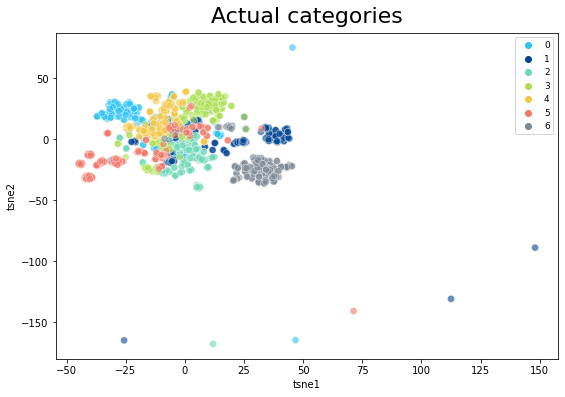

In [77]:
dftsne = df_tsne_bow.sort_values('product_category')
fontsize = 20
plt.figure(figsize=(9,6))
sns.scatterplot(
        x="tsne1", y="tsne2", hue="product_category", data=dftsne,palette=colors, s=50, alpha=0.6)

plt.title('Actual categories', fontsize = fontsize + 2, pad = 10)
plt.legend(loc='best', fontsize = 9)
plt.show()

In [78]:
dftsne2= dftsne[dftsne['tsne2']>-50]

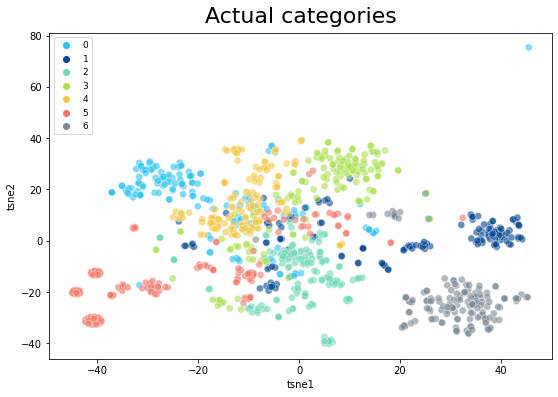

In [79]:
fontsize = 20
plt.figure(figsize=(9,6))
sns.scatterplot(
        x="tsne1", y="tsne2", hue="product_category", data=dftsne2,palette=colors, s=50, alpha=0.6)

plt.title('Actual categories', fontsize = fontsize + 2, pad = 10)
plt.legend(loc='best', fontsize = 9)
plt.show()

# 2ème  modélisation de BOW + ngram_range = (2, 2) + PCA + kmeans   

In [82]:
X = df['description_processed']

In [86]:
# create pipeline
pca = decomposition.PCA(n_components=0.99, svd_solver='full')
kmeans = KMeans(n_clusters=7, random_state=0, init='k-means++', n_init=10, max_iter=300) # default

pipeline = Pipeline([('vect', CountVectorizer(stop_words = 'english', 
                                              ngram_range = (2, 2), max_df= 0.65, min_df = 0)),
                     ('to_array', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
                     ('pca', pca),
                     ('scaler',  Normalizer()),
                     ('kmeans', kmeans) ])

In [87]:
model = pipeline.fit(X)
X_pred = pipeline.transform(X)

In [88]:
y_true = df['code']
y_pred = pd.Series(model['kmeans'].labels_)

In [89]:
y_true

0       4
1       0
2       0
3       4
4       4
       ..
1045    0
1046    0
1047    0
1048    0
1049    0
Name: code, Length: 1050, dtype: int8

In [90]:
y_pred

0       0
1       0
2       0
3       0
4       0
       ..
1045    0
1046    0
1047    1
1048    1
1049    1
Length: 1050, dtype: int32

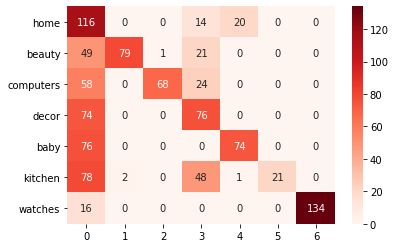

In [91]:
conf_mat = metrics.confusion_matrix(y_true, y_pred)
corresp, conf_mat = conf_mat_transform(conf_mat) 

dict_clusters = dict(zip(corresp, range(0,7)))
y_pred_transform = y_pred.map(dict_clusters)

#plot
df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds", fmt='g' )
plt.show()

In [92]:
y_pred_transform

0       0
1       0
2       0
3       0
4       0
       ..
1045    0
1046    0
1047    3
1048    3
1049    3
Length: 1050, dtype: int64

In [93]:
# ARI
ARI_BOW = metrics.adjusted_rand_score(y_true, y_pred_transform)
print(ARI_BOW)

0.21516858056507665


In [94]:
#save labels for plot
LABELS_BOW = y_pred_transform

In [96]:
vectorizer = CountVectorizer(stop_words = 'english', 
max_df=0.5, min_df=0, ngram_range=(2, 2), max_features=3000)

pca = pca = decomposition.PCA(n_components=0.99, svd_solver='full')
n = 2
tsne = tsne = manifold.TSNE(n_components=n, perplexity=30,
                         n_iter=2000, init='random', random_state=6)

pipeline_viz = Pipeline([ ('vect', vectorizer),
                          ('to_array', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),    
                          ('pca', pca),
                          ('tsne', tsne)
                        ])

X_tsne_bow = pipeline_viz.fit_transform(X)

In [97]:
# create df
df_tsne_bow = pd.DataFrame(X_tsne_bow[:,:2], columns=['tsne1', 'tsne2'])
df_tsne_bow['product_category'] = df['code']
df_tsne_bow['category'] = y_true
df_tsne_bow['clusters_kmeans']= LABELS_BOW 

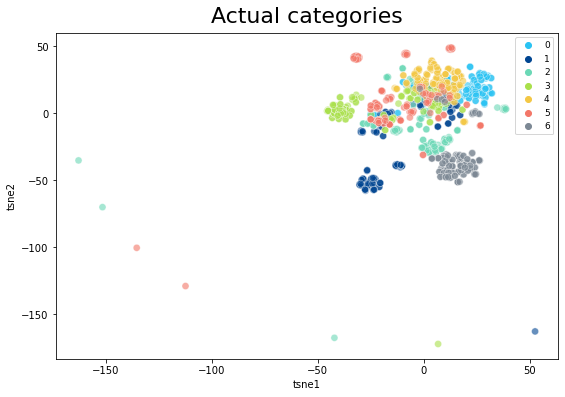

In [98]:
dftsne = df_tsne_bow.sort_values('product_category')
fontsize = 20
plt.figure(figsize=(9,6))
sns.scatterplot(
        x="tsne1", y="tsne2", hue="product_category", data=dftsne,palette=colors, s=50, alpha=0.6)

plt.title('Actual categories', fontsize = fontsize + 2, pad = 10)
plt.legend(loc='best', fontsize = 9)
plt.show()

In [99]:
dftsne2= dftsne[dftsne['tsne2']>-50]

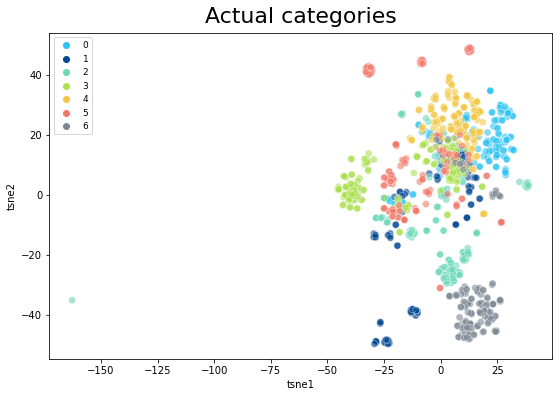

In [100]:
fontsize = 20
plt.figure(figsize=(9,6))
sns.scatterplot(
        x="tsne1", y="tsne2", hue="product_category", data=dftsne2,palette=colors, s=50, alpha=0.6)

plt.title('Actual categories', fontsize = fontsize + 2, pad = 10)
plt.legend(loc='best', fontsize = 9)
plt.show()

# 3ème modélisation TFIDF + PCA + Kmeans

In [227]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler,  Normalizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import manifold, decomposition
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [228]:
# TF IDF
tfidf = TfidfVectorizer()
vect = tfidf.fit_transform(X)

df_IDF = pd.DataFrame()
df_IDF['vocabulary'] = tfidf.get_feature_names()
df_IDF['description1'] = vect.toarray()[0]
df_IDF['description2'] = vect.toarray()[1]
df_IDF['description3'] = vect.toarray()[2]
df_IDF.set_index('vocabulary', inplace=True)
print(df_IDF.T)

vocabulary     aa  aaa  aapno  aari  aarika  abide  ability  abkl  able  \
description1  0.0  0.0    0.0   0.0     0.0    0.0      0.0   0.0   0.0   
description2  0.0  0.0    0.0   0.0     0.0    0.0      0.0   0.0   0.0   
description3  0.0  0.0    0.0   0.0     0.0    0.0      0.0   0.0   0.0   

vocabulary    abrasion  abroad  absolute  absorb  absorbency  absorbent  \
description1       0.0     0.0       0.0     0.0    0.000000        0.0   
description2       0.0     0.0       0.0     0.0    0.000000        0.0   
description3       0.0     0.0       0.0     0.0    0.064642        0.0   

vocabulary    absorber  abstract  abstrcts   ac  accent  access  accessory  \
description1       0.0  0.171128       0.0  0.0     0.0     0.0        0.0   
description2       0.0  0.000000       0.0  0.0     0.0     0.0        0.0   
description3       0.0  0.000000       0.0  0.0     0.0     0.0        0.0   

vocabulary    accident  accidental  accommodate  accomplish  accord  acer  \
descript

In [229]:
# Numérisation de la colonne category_0
df.category_0 = pd.Categorical(df.category_0)
df['code'] = df.category_0.cat.codes

In [230]:
df['code']

0       4
1       0
2       0
3       4
4       4
       ..
1045    0
1046    0
1047    0
1048    0
1049    0
Name: code, Length: 1050, dtype: int8

In [231]:
X = df['description_processed']
y_true = df['code']

In [232]:
# create pipeline (updated with best params from gridsearch below)
vectorizer = CountVectorizer(stop_words = 'english', 
max_df=0.5, min_df=0, ngram_range=(1, 1), max_features=3000)

kmeans = KMeans(n_clusters=7, random_state=0, max_iter=100, init='k-means++')

pipeline = Pipeline([('vect', vectorizer),
                     ('tfidf', TfidfTransformer(use_idf=True)),
                     ('to_array', FunctionTransformer(
                         lambda x: x.toarray(), accept_sparse=True)),
                     ('pca', decomposition.PCA(n_components=0.99, svd_solver='full')),
                     ('scaler',  Normalizer()),
                     ('kmeans', kmeans)])

In [233]:
# fit best model
model1 = pipeline.fit(X)
X_pred = pipeline.transform(X)
y_pred = pd.Series(pipeline.predict(X))

In [234]:
X_pred

array([[1.13023573, 1.15966894, 0.98059611, ..., 1.09285681, 1.13174341,
        1.11407598],
       [1.09010457, 1.17735955, 0.99606291, ..., 1.05623781, 1.13952407,
        1.10169904],
       [1.08158764, 1.17725352, 0.99461496, ..., 1.06635058, 1.1296769 ,
        1.11069512],
       ...,
       [1.0944605 , 1.16802455, 0.99483367, ..., 1.10818663, 1.12419543,
        1.08643179],
       [1.09526247, 1.17288317, 0.98993013, ..., 1.11532909, 1.12480054,
        1.0902448 ],
       [1.08936684, 1.17098936, 0.99363343, ..., 1.1157097 , 1.12123105,
        1.08694966]])

In [235]:
y_pred

0       2
1       2
2       2
3       2
4       2
       ..
1045    2
1046    2
1047    2
1048    2
1049    2
Length: 1050, dtype: int32

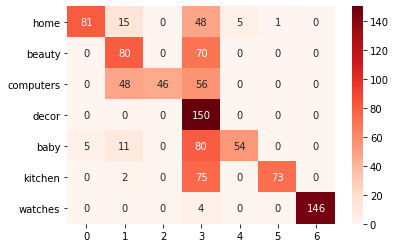

In [236]:
# confusion matrix and re-assign clusters
conf_mat = metrics.confusion_matrix(y_true, y_pred)
corresp, conf_mat = conf_mat_transform(conf_mat) 

dict_clusters = dict(zip(corresp, range(0,7)))
y_pred_transform = y_pred.map(dict_clusters)

#plot
df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds", fmt='g' )
plt.show()

In [237]:
# ARI
ARI_TFIDF = metrics.adjusted_rand_score(y_true, y_pred_transform)
print(ARI_TFIDF)

0.2662851201325656


In [238]:
categories

['home', 'beauty', 'computers', 'decor', 'baby', 'kitchen', 'watches']

In [239]:
# Save labels 
LABELS_TFIDF = y_pred_transform

In [241]:
pca = pca = decomposition.PCA(n_components=0.99, svd_solver='full')
n = 2
tsne = tsne = manifold.TSNE(n_components=n, perplexity=30,
                         n_iter=2000, init='random', random_state=6)

pipeline_viz = Pipeline([('vect', vectorizer),
                         ('to_array', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
                         ('pca', pca),
                          ('tsne', tsne)
                        ])

X_tsne_tfidf = pipeline_viz.fit_transform(X)

In [242]:
# create df
df_tsne_tfidf = pd.DataFrame(X_tsne_tfidf[:,:2], columns=['tsne1', 'tsne2'])
df_tsne_tfidf['product_category'] = df['code']
df_tsne_tfidf['category'] = y_true
df_tsne_tfidf['clusters_kmeans']= LABELS_TFIDF

In [243]:
# Set colors for plots
light_blue = '#2AC3F3'
blue_green = '#6BD8B6'
green = '#A9E04B'
dark_blue = '#004591'
yellow = '#F3C744'
red = '#F37768'
gray = '#7C8894'
colors = [light_blue, dark_blue, blue_green, green, yellow, red, gray]

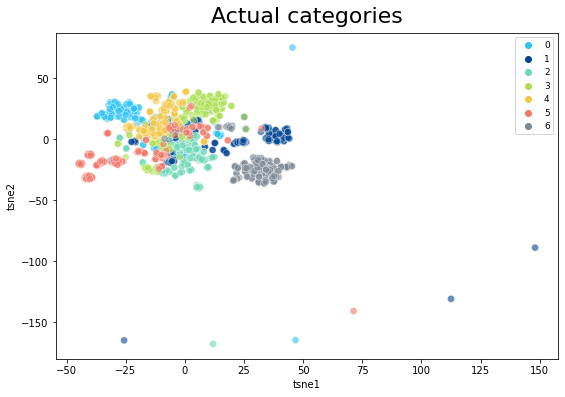

In [244]:
dftsne = df_tsne_tfidf.sort_values('product_category')
fontsize = 20
plt.figure(figsize=(9,6))
sns.scatterplot(
        x="tsne1", y="tsne2", hue="product_category", data=dftsne,palette=colors, s=50, alpha=0.6)

plt.title('Actual categories', fontsize = fontsize + 2, pad = 10)
plt.legend(loc='best', fontsize = 9)
plt.show()

In [247]:
dftsne2= dftsne[dftsne['tsne2']>-50]

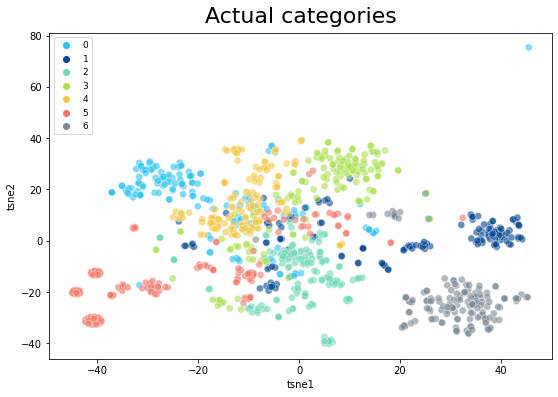

In [248]:
fontsize = 20
plt.figure(figsize=(9,6))
sns.scatterplot(
        x="tsne1", y="tsne2", hue="product_category", data=dftsne2,palette=colors, s=50, alpha=0.6)

plt.title('Actual categories', fontsize = fontsize + 2, pad = 10)
plt.legend(loc='best', fontsize = 9)
plt.show()

# 4ème modélisation avec embedding Universal Sentence Encoder

In [155]:
pip install "tensorflow>=1.7.0"

In [249]:
pip install tensorflow-hub

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow-hub in d:\anaconda\lib\site-packages (0.12.0)



In [251]:
import tensorflow_hub as hub

In [252]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [253]:
data = df.description_processed.values.tolist()

In [256]:
embeddings = embed(data)

In [257]:
X = embeddings

In [258]:
X

<tf.Tensor: shape=(1050, 512), dtype=float32, numpy=
array([[-0.05313345, -0.05335029,  0.01701603, ...,  0.04609688,
         0.03895068, -0.03543512],
       [-0.04505129, -0.04864701, -0.00403904, ...,  0.02970061,
         0.0313563 ,  0.01626789],
       [-0.05374871, -0.05019254, -0.01644756, ...,  0.04867152,
        -0.03173289, -0.04991818],
       ...,
       [-0.00479772, -0.05075457,  0.01847768, ..., -0.05316435,
         0.04329827, -0.05382342],
       [-0.02601582, -0.05226224,  0.03394317, ...,  0.02035107,
        -0.0123851 , -0.0097791 ],
       [-0.04655474, -0.04521006,  0.01941034, ...,  0.02409775,
        -0.00889808, -0.00372404]], dtype=float32)>

In [259]:
y_true = df['code']
y_true=list(y_true)

In [260]:
# create pipeline 
kmeans = KMeans(n_clusters=7, random_state=0, max_iter=100, init='k-means++')
pipeline = Pipeline([('kmeans', kmeans)])

In [261]:
# fit best model
model2 = pipeline.fit(X)
y_pred = pd.Series(pipeline.predict(X))

In [262]:
y_pred

0       1
1       1
2       0
3       1
4       1
       ..
1045    0
1046    0
1047    2
1048    2
1049    2
Length: 1050, dtype: int32

In [263]:
categories

['home', 'beauty', 'computers', 'decor', 'baby', 'kitchen', 'watches']

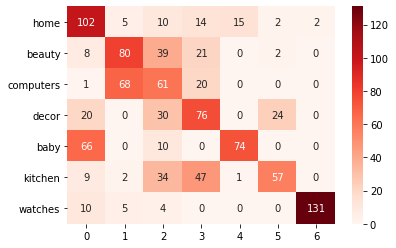

In [264]:
# confusion matrix and re-assign clusters
conf_mat = metrics.confusion_matrix(y_true, y_pred)
corresp, conf_mat = conf_mat_transform(conf_mat) 

dict_clusters = dict(zip(corresp, range(0,7)))
y_pred_transform = y_pred.map(dict_clusters)

#plot
df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds", fmt='g' )
plt.show()

In [265]:
# ARI
ARI_USE = metrics.adjusted_rand_score(y_true, y_pred_transform)
print(ARI_USE)

0.31783515912696503


In [266]:
# Save labels 
LABELS_USE = y_pred_transform

In [268]:
pca = pca = decomposition.PCA(n_components=0.99, svd_solver='full')
n = 2
tsne = tsne = manifold.TSNE(n_components=n, perplexity=30,
                         n_iter=2000, init='random', random_state=6)

pipeline_viz = Pipeline([
                         
                         ('pca', pca),
                          ('tsne', tsne)
                        ])

X_tsne_use = pipeline_viz.fit_transform(X)

In [269]:
# create df
df_tsne_use = pd.DataFrame(X_tsne_use[:,:2], columns=['tsne1', 'tsne2'])
df_tsne_use['product_category'] = df['code']
df_tsne_use['category'] = y_true
df_tsne_use['clusters_use']= LABELS_USE

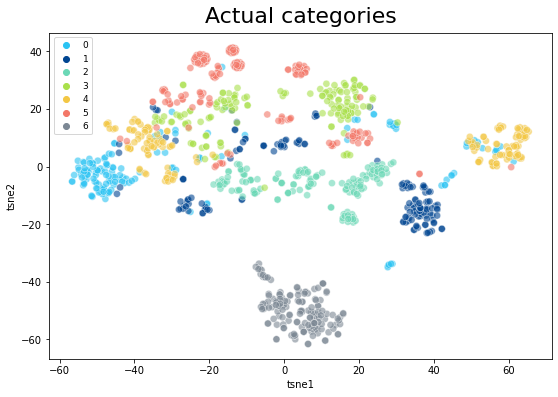

In [270]:
dftsneuse = df_tsne_use.sort_values('product_category')
fontsize = 20
plt.figure(figsize=(9,6))
sns.scatterplot(
        x="tsne1", y="tsne2", hue="product_category", data=dftsneuse,palette=colors, s=50, alpha=0.6)

plt.title('Actual categories', fontsize = fontsize + 2, pad = 10)
plt.legend(loc='best', fontsize = 9)
plt.show()

In [271]:
dftsne2= dftsne[dftsne['tsne2']>-60]

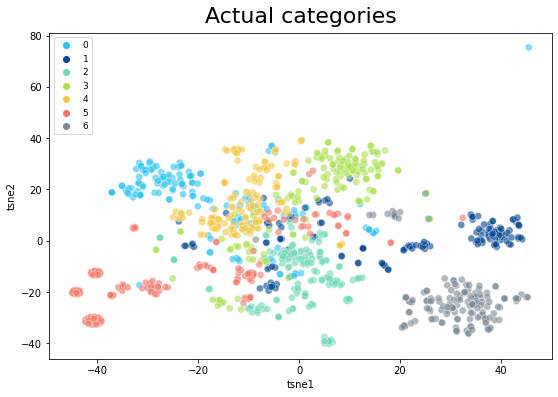

In [272]:
fontsize = 20
plt.figure(figsize=(9,6))
sns.scatterplot(
        x="tsne1", y="tsne2", hue="product_category", data=dftsne2,palette=colors, s=50, alpha=0.6)

plt.title('Actual categories', fontsize = fontsize + 2, pad = 10)
plt.legend(loc='best', fontsize = 9)
plt.show()

# Word2vec embedding

In [ ]:
# analyser l’embedding en regardant quel mot est similaire à quel autre

In [273]:
# Pour cet embedding, il faut que nos données soient sous forme de tokens (chaque mot séparé) et non sous forme de phrases
data = df.description_processed.values.tolist()

In [274]:
tokenize_sentences = []

for i in range(len(data)):
 tokenize_sentences.append(nltk.tokenize.word_tokenize(data[i]))

In [275]:
tokenize_sentences

[['key',
  'feature',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'floral',
  'curtain',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'cm',
  'height',
  'pack',
  'price',
  'r',
  'curtain',
  'enhance',
  'look',
  'interior',
  'curtain',
  'make',
  'high',
  'quality',
  'polyester',
  'fabric',
  'feature',
  'eyelet',
  'style',
  'stitch',
  'metal',
  'ring',
  'make',
  'room',
  'environment',
  'romantic',
  'love',
  'curtain',
  'ant',
  'wrinkle',
  'anti',
  'shrinkage',
  'elegant',
  'apparance',
  'give',
  'home',
  'bright',
  'modernistic',
  'appeal',
  'design',
  'surreal',
  'attention',
  'sure',
  'steal',
  'heart',
  'contemporary',
  'eyelet',
  'valance',
  'curtain',
  'slide',
  'smoothly',
  'draw',
  'apart',
  'first',
  'thing',
  'morning',
  'welcome',
  'bright',
  'sun',
  'ray',
  'want',
  'wish',
  'good',
  'morning',
  'whole',
  'world'

In [276]:
# fonction Word2Vec de la librairie Gensim

In [277]:
# cinq paramètres principaux 
# size : La dimension du vecteur créé, idéalement inférieur au nombre de mots du vocabulaire
# fenêtre : La distance maximale entre un mot cible et les mots autour du mot cible. La fenêtre par défaut est de 5.
# min_count : Le nombre minimum de mots à prendre en compte lors de l’apprentissage du modèle ; les mots dont l’occurrence est inférieure à ce nombre seront ignorés. La valeur par défaut de min_count est 5.
# worker : Le nombre de lots créés pour l’entraînement, par défaut il y en a 3

In [313]:
# initialise le Word2Vec, puis on l’entraîne sur nos données
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [279]:
model3 = Word2Vec(sentences=tokenize_sentences, workers=1)

In [280]:
# A common approach is to use the average of the vectors. This approach works well for short texts. For longer texts, there's not a clear consensus what will work well. Though, using a weighted average the vectors might help.

In [281]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(tokenize_sentences, model=model3)
len(vectorized_docs), len(vectorized_docs[0])

(1050, 100)

In [282]:
model3.wv.most_similar("curtain")

[('door', 0.9991134405136108),
 ('polyresin', 0.9975771903991699),
 ('seat', 0.9974551796913147),
 ('eyelet', 0.9967736601829529),
 ('brown', 0.9966478943824768),
 ('tawa', 0.9963085651397705),
 ('diwan', 0.9962598085403442),
 ('trimning', 0.995930552482605),
 ('gram', 0.9956544637680054),
 ('frame', 0.9956429600715637)]

In [283]:
model3.wv.most_similar("watch")

[('men', 0.9990457892417908),
 ('analog', 0.9937520027160645),
 ('woman', 0.9818076491355896),
 ('yl', 0.959369421005249),
 ('cmgy', 0.9483534693717957),
 ('lmgy', 0.9396765232086182),
 ('sl', 0.9317268133163452),
 ('buy', 0.9260735511779785),
 ('attivo', 0.919815719127655),
 ('ym', 0.9178928136825562)]

In [284]:
# Le modèle a appris la similarité des mots en fonction du contexte de nos phrases

In [189]:
# A common approach is to use the average of the vectors. This approach works well for short texts. For longer texts, there's not a clear consensus what will work well. Though, using a weighted average the vectors might help.

In [111]:
# The following code will help you create a vector per document by averaging its word vectors. Create a new cell in your notebook and copy this code there:

In [290]:
#This function creates the clusters using the Mini-batches K-means algorithm. It takes the following arguments:
#
#    X: Matrix of features. In this case, it's your vectorized documents.
#    k: Number of clusters you'd like to create.
#    mb: Size of mini-batches.
#    print_silhouette_values: Defines if the Silhouette Coefficient is printed for each cluster. If you haven't heard about this coefficient, don't worry, you'll learn about it in a bit!

In [291]:
def mbkmeans_clusters(
    X, 
    k, 
    mb, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [292]:
clustering, cluster_labels = mbkmeans_clusters(
    X=vectorized_docs,
    k=7,
    mb=500,
    print_silhouette_values=False,
)
df_clusters = pd.DataFrame({
    "text": tokenize_sentences,
    "tokens": [" ".join(text) for text in tokenize_sentences],
    "cluster": cluster_labels
})

For n_clusters = 7
Silhouette coefficient: 0.38
Inertia:179.94230590063688


In [293]:
df_clusters

,text,tokens,cluster
0,"[key, feature, elegance, polyester, multicolor...",key feature elegance polyester multicolor abst...,1
1,"[specification, sathiyas, cotton, bath, towel,...",specification sathiyas cotton bath towel bath ...,3
2,"[key, feature, eurospa, cotton, terry, face, t...",key feature eurospa cotton terry face towel se...,1
3,"[key, feature, santosh, royal, fashion, cotton...",key feature santosh royal fashion cotton print...,3
4,"[key, feature, jaipur, print, cotton, floral, ...",key feature jaipur print cotton floral king si...,3
...,...,...,...
1045,"[oren, empower, extra, large, self, adhesive, ...",oren empower extra large self adhesive sticker...,5
1046,"[wallmantra, large, vinyl, sticker, sticker, p...",wallmantra large vinyl sticker sticker pack pr...,5
1047,"[buy, uberlyfe, extra, large, pigment, polyvin...",buy uberlyfe extra large pigment polyvinyl fil...,2
1048,"[buy, wallmantra, medium, vinyl, sticker, stic...",buy wallmantra medium vinyl sticker sticker r ...,2


In [294]:
y_true = df['code']

In [295]:
y_true

0       4
1       0
2       0
3       4
4       4
       ..
1045    0
1046    0
1047    0
1048    0
1049    0
Name: code, Length: 1050, dtype: int8

In [296]:
y_pred = df_clusters['cluster']

In [297]:
y_pred

0       1
1       3
2       1
3       3
4       3
       ..
1045    5
1046    5
1047    2
1048    2
1049    2
Name: cluster, Length: 1050, dtype: int32

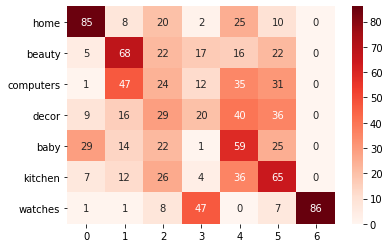

In [298]:
# confusion matrix and re-assign clusters
conf_mat = metrics.confusion_matrix(y_true, y_pred)
corresp, conf_mat = conf_mat_transform(conf_mat) 

dict_clusters = dict(zip(corresp, range(0,7)))
y_pred_transform = y_pred.map(dict_clusters)

#plot
df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds", fmt='g' )
plt.show()

In [299]:
# ARI
ARI_W2VEC = metrics.adjusted_rand_score(y_true, y_pred_transform)
print(ARI_W2VEC)

0.15041574779368097


In [300]:
# Save labels 
LABELS_W2VEC = y_pred_transform

In [301]:
X = vectorized_docs

In [305]:
pca = pca = decomposition.PCA(n_components=0.99, svd_solver='full')
n = 2
tsne = tsne = manifold.TSNE(n_components=n, perplexity=30,
                         n_iter=2000, init='random', random_state=6)

pipeline_viz = Pipeline([
                         
                         ('pca', pca),
                          ('tsne', tsne)
                        ])

X_tsne_w2vec = pipeline_viz.fit_transform(X)

In [306]:
# create df
df_tsne_w2vec = pd.DataFrame(X_tsne_w2vec[:,:2], columns=['tsne1', 'tsne2'])
df_tsne_w2vec['product_category'] = df['code']
df_tsne_w2vec['category'] = y_true
df_tsne_w2vec['clusters_w2vec']= LABELS_W2VEC

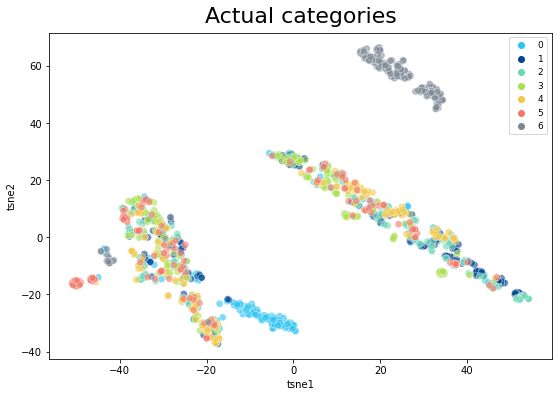

In [307]:
dftsnew2vec = df_tsne_w2vec.sort_values('product_category')
fontsize = 20
plt.figure(figsize=(9,6))
sns.scatterplot(
        x="tsne1", y="tsne2", hue="product_category", data=dftsnew2vec,palette=colors, s=50, alpha=0.6)

plt.title('Actual categories', fontsize = fontsize + 2, pad = 10)
plt.legend(loc='best', fontsize = 9)
plt.show()

# LDA

In [309]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [310]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [323]:
# Convert to list
data_words = tokenize_sentences
print(data_words[:1])

[['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'cm', 'height', 'pack', 'price', 'r', 'curtain', 'enhance', 'look', 'interior', 'curtain', 'make', 'high', 'quality', 'polyester', 'fabric', 'feature', 'eyelet', 'style', 'stitch', 'metal', 'ring', 'make', 'room', 'environment', 'romantic', 'love', 'curtain', 'ant', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'apparance', 'give', 'home', 'bright', 'modernistic', 'appeal', 'design', 'surreal', 'attention', 'sure', 'steal', 'heart', 'contemporary', 'eyelet', 'valance', 'curtain', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'ray', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'even', 'create', 'special', 'moment', 'joyous', 'beauty', 'give', 'soothe', 'print', 'bring', 'home', 'elegant', 'curtain', 'softly', 'filter', 

In [324]:
import gensim.corpora as corpora
# Create Dictionary
# storing the extracted tokens into the dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 4), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 11), (21, 3), (22, 1), (23, 5), (24, 2), (25, 1), (26, 4), (27, 2), (28, 1), (29, 1)]


In [325]:
my_dictionary = corpora.Dictionary(data_words)
print(my_dictionary)

Dictionary(4294 unique tokens: ['abstract', 'amount', 'ant', 'anti', 'apart']...)


In [327]:
my_dictionary.save('/Users/Catherine/my_dictionary.dict')

In [329]:
load_dict = corpora.Dictionary.load('/Users/Catherine/my_dictionary.dict')

In [330]:
from gensim.test.utils import get_tmpfile
tmp_fname = get_tmpfile("dictionary")
my_dictionary.save_as_text(tmp_fname)

In [331]:
load_dict = corpora.Dictionary.load_from_text(tmp_fname)

In [332]:
BoW_corpus =[my_dictionary.doc2bow(doc, allow_update = True) for doc in data_words]

In [333]:
from gensim.corpora import MmCorpus
from gensim.test.utils import get_tmpfile
 
output_fname = get_tmpfile("BoW_corpus.mm")
 
# save corpus to disk
MmCorpus.serialize(output_fname, BoW_corpus)
 
# load corpus
load_corpus = MmCorpus(output_fname)

In [334]:
from pprint import pprint

# number of topics
num_topics = 7

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 7 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.014*"cm" + 0.011*"color" + 0.010*"feature" + 0.009*"baby" + 0.009*"pack" '
  '+ 0.009*"cotton" + 0.009*"specification" + 0.008*"design" + 0.008*"product" '
  '+ 0.008*"print"'),
 (1,
  '0.018*"mug" + 0.013*"feature" + 0.012*"detail" + 0.012*"ceramic" + '
  '0.011*"r" + 0.011*"product" + 0.011*"perfect" + 0.011*"make" + '
  '0.011*"specification" + 0.010*"one"'),
 (2,
  '0.028*"flipkart" + 0.027*"com" + 0.027*"r" + 0.024*"product" + '
  '0.024*"watch" + 0.023*"free" + 0.023*"ship" + 0.023*"delivery" + '
  '0.023*"cash" + 0.023*"genuine"'),
 (3,
  '0.018*"cm" + 0.015*"mug" + 0.013*"r" + 0.011*"product" + 0.010*"design" + '
  '0.009*"price" + 0.008*"color" + 0.008*"feature" + 0.008*"specification" + '
  '0.007*"box"'),
 (4,
  '0.011*"price" + 0.009*"r" + 0.009*"make" + 0.009*"pack" + 0.009*"set" + '
  '0.009*"product" + 0.008*"box" + 0.008*"type" + 0.008*"package" + '
  '0.007*"material"'),
 (5,
  '0.013*"battery" + 0.013*"mug" + 0.011*"product" + 0.010*"r" + '
  '0.010*"replace

In [335]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

In [338]:
LDAvis_data_filepath = os.path.join('/Users/Catherine/my_dictionary.dict'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/Users/Catherine/my_dictionary.dict'+ str(num_topics) +'.html')
LDAvis_prepared

D:\ANACONDA\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.053670 -0.040003       1        1  21.585461
2     -0.177500  0.021791       2        1  16.729069
4      0.050134 -0.046220       3        1  16.204526
3      0.045160 -0.017791       4        1  13.800302
6     -0.059294 -0.039706       5        1  13.510150
1      0.065419  0.094137       6        1   9.658292
5      0.022410  0.027794       7        1   8.512199, topic_info=                      Term        Freq       Total Category  logprob  loglift
207                    com  432.000000  432.000000  Default  30.0000  30.0000
211               flipkart  441.000000  441.000000  Default  29.0000  29.0000
222                  watch  354.000000  354.000000  Default  28.0000  28.0000
678                    mug  412.000000  412.000000  Default  27.0000  27.0000
206                   cash  491.000000  491.000000  Default  26.0000  26.0000
204                 analog  265.000000  265.000000  Default  25.0000  25.0000
209               delivery  495.000000  495.000000  Default  24.0000  24.0000
213                genuine  492.000000  492.000000  Default  23.0000  23.0000
220                   ship  500.000000  500.000000  Default  22.0000  22.0000
205                    buy  509.000000  509.000000  Default  21.0000  21.0000
212                   free  543.000000  543.000000  Default  20.0000  20.0000
215              guarantee  421.000000  421.000000  Default  19.0000  19.0000
208                    day  495.000000  495.000000  Default  18.0000  18.0000
218                 online  369.000000  369.000000  Default  17.0000  17.0000
1367               battery  109.000000  109.000000  Default  16.0000  16.0000
69                       r  827.000000  827.000000  Default  15.0000  15.0000
219            replacement  501.000000  501.000000  Default  14.0000  14.0000
1434            rockmantra   57.000000   57.000000  Default  13.0000  13.0000
781                perfect  172.000000  172.000000  Default  12.0000  12.0000
498                ceramic  191.000000  191.000000  Default  11.0000  11.0000
149                product  773.000000  773.000000  Default  10.0000  10.0000
669                 coffee  151.000000  151.000000  Default   9.0000   9.0000
210               discount  136.000000  136.000000  Default   8.0000   8.0000
111                    men  174.000000  174.000000  Default   7.0000   7.0000
644                 detail  244.000000  244.000000  Default   6.0000   6.0000
308                    one  146.000000  146.000000  Default   5.0000   5.0000
216                  india  179.000000  179.000000  Default   4.0000   4.0000
999                  dress  101.000000  101.000000  Default   3.0000   3.0000
724                    usb  154.000000  154.000000  Default   2.0000   2.0000
15                      cm  548.000000  548.000000  Default   1.0000   1.0000
2992            chocoberry    5.193226    6.031451   Topic1  -7.7698   1.3835
4133                shadow    6.088693    7.216530   Topic1  -7.6107   1.3632
1759                 inlay    4.024150    4.778088   Topic1  -8.0249   1.3614
2692                     j    3.747298    4.640073   Topic1  -8.0961   1.3195
1245                  klub   15.199346   18.874548   Topic1  -6.6959   1.3166
2991                 capri    6.517660    8.206551   Topic1  -7.5426   1.3027
798                   nail   10.981417   13.896112   Topic1  -7.0210   1.2977
321                cartier    2.743942    3.497705   Topic1  -8.4078   1.2904
1274                  omic    6.337266    8.168862   Topic1  -7.5707   1.2793
3740               tanager    2.697248    3.480994   Topic1  -8.4249   1.2781
1227                 kurti    4.473840    5.795166   Topic1  -7.9189   1.2744
3587                 homec    3.551380    4.608483   Topic1  -8.1498   1.2726
770              casserole    8.692712   11.296922   Topic1  -7.2547   1.2711
3739               scarlet    2.638502 